# Core Imports and Setup

In [1]:
import os
from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

import logging
logging.getLogger("openff.toolkit").setLevel(logging.ERROR)

from openff import toolkit, evaluator

from openff.units import unit

# 0) Registering Custom ThermoML Properties

In [2]:
from openff.evaluator import properties
from openff.evaluator.datasets.thermoml import thermoml_property
from openff.evaluator.datasets import PhysicalProperty, PropertyPhase

@thermoml_property("Osmotic coefficient", supported_phases=PropertyPhase.Liquid)
class OsmoticCoefficient(PhysicalProperty):
    """A class representation of a osmotic coeff property"""

    @classmethod
    def default_unit(cls):
        return unit.dimensionless
    
...

custom_thermoml_props = [
    OsmoticCoefficient,
]

for custom_prop_cls in custom_thermoml_props:    
    setattr(properties, custom_prop_cls.__name__, custom_prop_cls)

# 1) - Loading ThermoML Data Sets

## Extracting data from ThermoML

In [3]:
from openff.evaluator.datasets import PhysicalProperty, PropertyPhase, PhysicalPropertyDataSet
from openff.evaluator.datasets.thermoml import thermoml_property, ThermoMLDataSet

data_set_initial = PhysicalPropertyDataSet.from_json("freesolv.json")
data_set_initial.to_pandas()

,Id,Temperature (K),Pressure (kPa),Phase,N Components,Component 1,Role 1,Mole Fraction 1,Exact Amount 1,Component 2,Role 2,Mole Fraction 2,Exact Amount 2,SolvationFreeEnergy Value (kJ / mol),SolvationFreeEnergy Uncertainty (kJ / mol),Source
0,265c7378309c4355aa01d60af70d3fca,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCCCCC(=O)OC,Solute,None,1,-10.41816,2.5104,10.1021/ct050097l
1,f89c43a7ef684aca89df924b29c487b1,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCCCO,Solute,None,1,-19.74848,2.5104,10.1021/ct050097l
2,198b886769694cc39828af5af498fd24,298.15,101.325,Liquid,2,O,Solvent,1.0,None,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)cc1Cl,Solute,None,1,-12.71936,0.4184,10.1007/s10822-012-9568-8
3,6cdf0d7abd354d8284ffe115d4c0ef33,298.15,101.325,Liquid,2,O,Solvent,1.0,None,NC1CCCCC1,Solute,None,1,-19.20456,2.5104,10.1021/ct050097l
4,e3e4778832a240eba754b5d4d010d21d,298.15,101.325,Liquid,2,O,Solvent,1.0,None,O=COc1ccccc1,Solute,None,1,-15.98288,2.5104,10.5281/zenodo.596537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,0821476bf69143c4bd07f6e0d7f8e584,298.15,101.325,Liquid,2,O,Solvent,1.0,None,Cl/C=C/Cl,Solute,None,1,-3.26352,2.5104,10.1021/ct050097l
638,2e03601fd70142dd8092cc1eceb17b83,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCc1ccc(C)cc1,Solute,None,1,-3.97480,2.5104,10.1021/ct050097l
639,4ceca25966d64d3c88b9380829e7fa86,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCBr,Solute,None,1,-3.09616,2.5104,10.1021/ct050097l
640,bca16f5d94f54cf987903bcec2f9662b,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CC(C)SC(C)C,Solute,None,1,-5.06264,2.5104,10.1021/ct050097l


In [4]:
print(len(data_set_initial))
print(data_set_initial.property_types)
print(data_set_initial.substances)

642
{'SolvationFreeEnergy'}
{<Substance Clc1ccc2c(c1)Oc1cc(Cl)c(Cl)c(Cl)c1O2{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CC(C)I{sol}{n=1}|O{solv}{x=1.000000}>, <Substance Clc1cc(Cl)c(Cl)c(Cl)c1{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CC(F)F{sol}{n=1}|O{solv}{x=1.000000}>, <Substance ClC(Cl)(Cl)Cl{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CC(C)OC=O{sol}{n=1}|O{solv}{x=1.000000}>, <Substance C=CCl{sol}{n=1}|O{solv}{x=1.000000}>, <Substance Nc1ccccc1Cl{sol}{n=1}|O{solv}{x=1.000000}>, <Substance C[C@H]1CC[C@H](C)O1{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CCCCOC(C)=O{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CCCNCCC{sol}{n=1}|O{solv}{x=1.000000}>, <Substance COCC(OC)(OC)OC{sol}{n=1}|O{solv}{x=1.000000}>, <Substance C1CCNCC1{sol}{n=1}|O{solv}{x=1.000000}>, <Substance Cc1ccncc1C{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CCCCCCC(C)=O{sol}{n=1}|O{solv}{x=1.000000}>, <Substance O=Cc1ccccc1{sol}{n=1}|O{solv}{x=1.000000}>, <Substance OCc1ccccc1{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CC

## Filtering data set

In [5]:
from openff.evaluator.datasets.curation.components.filtering import FilterByPropertyTypes, FilterByPropertyTypesSchema
from openff.evaluator.datasets.curation.components.filtering import FilterByTemperature, FilterByTemperatureSchema
from openff.evaluator.datasets.curation.components.filtering import FilterByPressure, FilterByPressureSchema
from openff.evaluator.datasets.curation.components.filtering import FilterBySmiles, FilterBySmilesSchema

data_set_sfes= FilterByPropertyTypes.apply(
    data_set_initial, FilterByPropertyTypesSchema(property_types=["SolvationFreeEnergy"]))

print(len(data_set_sfes))

642


### Inspecting and saving new properties

In [7]:
# save for future use
data_set_path = Path('filtered_dataset_sfes.json')
data_set_sfes.json(data_set_path, format=True)

# inspect new properties
sfes_df = data_set_sfes.to_pandas()


In [8]:
sfes_df

,Id,Temperature (K),Pressure (kPa),Phase,N Components,Component 1,Role 1,Mole Fraction 1,Exact Amount 1,Component 2,Role 2,Mole Fraction 2,Exact Amount 2,SolvationFreeEnergy Value (kJ / mol),SolvationFreeEnergy Uncertainty (kJ / mol),Source
0,265c7378309c4355aa01d60af70d3fca,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCCCCC(=O)OC,Solute,None,1,-10.41816,2.5104,10.1021/ct050097l
1,f89c43a7ef684aca89df924b29c487b1,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCCCO,Solute,None,1,-19.74848,2.5104,10.1021/ct050097l
2,198b886769694cc39828af5af498fd24,298.15,101.325,Liquid,2,O,Solvent,1.0,None,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)cc1Cl,Solute,None,1,-12.71936,0.4184,10.1007/s10822-012-9568-8
3,6cdf0d7abd354d8284ffe115d4c0ef33,298.15,101.325,Liquid,2,O,Solvent,1.0,None,NC1CCCCC1,Solute,None,1,-19.20456,2.5104,10.1021/ct050097l
4,e3e4778832a240eba754b5d4d010d21d,298.15,101.325,Liquid,2,O,Solvent,1.0,None,O=COc1ccccc1,Solute,None,1,-15.98288,2.5104,10.5281/zenodo.596537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,0821476bf69143c4bd07f6e0d7f8e584,298.15,101.325,Liquid,2,O,Solvent,1.0,None,Cl/C=C/Cl,Solute,None,1,-3.26352,2.5104,10.1021/ct050097l
638,2e03601fd70142dd8092cc1eceb17b83,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCc1ccc(C)cc1,Solute,None,1,-3.97480,2.5104,10.1021/ct050097l
639,4ceca25966d64d3c88b9380829e7fa86,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCBr,Solute,None,1,-3.09616,2.5104,10.1021/ct050097l
640,bca16f5d94f54cf987903bcec2f9662b,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CC(C)SC(C)C,Solute,None,1,-5.06264,2.5104,10.1021/ct050097l


## Getting smiles

In [9]:
from rdkit import Chem
from rdkit.Chem import FilterCatalog
from openff.evaluator.substances import Component, Substance

In [10]:
subs=list(set(data_set_sfes.substances))
smiles_list=[]

for i in subs:
    comps=[]
    comps.append(i.components[0].smiles)
    comps.append(i.components[1].smiles)
    for o in comps:
        comps.remove('O')
        [smiles_list.append(y) for y in comps]

mols_list=[]

for s in smiles_list:
    m=Chem.MolFromSmiles(s)
    mols_list.append(m)

In [20]:
funcs=[]
fc = FilterCatalog.GetFunctionalGroupHierarchy()
for i in range(len(mols_list)):
    whtv=mols_list[i]
    for match in fc.GetMatches(whtv):
        ffg=match.GetDescription()
        funcs.append(ffg)
    print(i,ffg)

0 Halogen
1 Halogen
2 Halogen
3 Halogen
4 Halogen
5 Halogen
6 Halogen
7 Halogen
8 Halogen
9 Halogen
10 Amine
11 Amine
12 Amine
13 Amine
14 Amine
15 Aldehyde
16 Alcohol
17 Halogen
18 Halogen
19 Halogen
20 Alcohol
21 Halogen
22 Halogen
23 Halogen
24 Alcohol
25 Aldehyde
26 Amine
27 Amine
28 Alcohol
29 Halogen
30 Alcohol
31 Amine
32 Alcohol
33 Alcohol
34 Amine
35 Halogen
36 Halogen
37 Halogen
38 Amine
39 Amine
40 Halogen
41 Alcohol
42 Alcohol
43 Alcohol
44 Alcohol
45 Halogen
46 Halogen
47 Aldehyde
48 Halogen
49 Halogen
50 Halogen
51 Halogen
52 Halogen
53 Halogen
54 Alcohol
55 Alcohol
56 Alcohol
57 Alcohol
58 SulfonylChloride
59 Alcohol
60 Alcohol
61 Alcohol
62 Alcohol
63 Alcohol
64 Alcohol
65 Alcohol
66 Halogen
67 Alcohol
68 Amine
69 Amine
70 Amine
71 CarboxylicAcid
72 CarboxylicAcid
73 CarboxylicAcid
74 CarboxylicAcid
75 CarboxylicAcid
76 Alcohol
77 Alcohol
78 Alcohol
79 Nitro
80 Halogen
81 Halogen
82 Halogen
83 Halogen
84 Nitro
85 Halogen
86 Halogen
87 Amine
88 Amine
89 Halogen
90 Amine


In [22]:
set(funcs)

{'Alcohol',
 'Aldehyde',
 'Amine',
 'CarboxylicAcid',
 'Halogen',
 'Nitro',
 'SulfonylChloride',
 'TerminalAlkyne'}

In [23]:
def get_func_smiles(initial_data_set):
    subs=list(set(initial_data_set.substances))
    smiles_list=[]

    for i in subs:
        comps=[]
        comps.append(i.components[0].smiles)
        comps.append(i.components[1].smiles)
        for o in comps:
            comps.remove('O')
            [smiles_list.append(y) for y in comps]


    mols_list=[]

    for s in smiles_list:
        m=Chem.MolFromSmiles(s)
        mols_list.append(m)

    all=[]
    alcohols=[]
    aldehydes=[]
    amines=[]
    carboxylics=[]
    halogens=[]
    nitros=[]
    sulf_chlorides=[]
    terminal_alkynes=[]
    other=[]
    both=[]
    
    fc = FilterCatalog.GetFunctionalGroupHierarchy()
    for i in range(len(mols_list)):
        whtv=mols_list[i]
        if not fc.GetMatches(whtv):
            other.append(i)
        else:
            for match in fc.GetMatches(whtv):
                ffg=match.GetDescription()
                all.append(i)
                # print(i,ffg)
                if ffg == 'Amine':
                    amines.append(i)
                elif ffg == 'Alcohol':
                    alcohols.append(i)
                elif ffg == 'Aldehyde':
                    aldehydes.append(i)
                elif ffg == 'CarboxylicAcid':
                    carboxylics.append(i)
                elif ffg == 'Halogen':
                    halogens.append(i)
                elif ffg == 'Nitro':
                    nitros.append(i) 
                elif ffg == 'SulfonylChloride':
                    sulf_chlorides.append(i)
                elif ffg == 'TerminalAlkyne':
                    terminal_alkynes.append(i)       
                if i in amines and i in alcohols:
                    both.append(i)
                    amines.remove(i)
                    alcohols.remove(i)
    

    def get_smiles(func_type):
        smiles=[]

        for x in func_type:
            comp0=subs[x].components[0].smiles
            comp1=subs[x].components[1].smiles
            if comp0 != 'O':
                smiles.append(comp0)
            if comp1 != 'O':
                smiles.append(comp1)
            # smiles.append(comp0) 
            # smiles.append(comp1)
        smiles.append('O')
        return smiles

    smiles_results={}

    smiles_results['all']=get_smiles(all)
    smiles_results['alcohols']=get_smiles(alcohols)
    smiles_results['aldehydes']=get_smiles(aldehydes)
    smiles_results['carboxylics']=get_smiles(carboxylics)
    smiles_results['halogens']=get_smiles(halogens)
    smiles_results['amines']=get_smiles(amines)
    smiles_results['nitros']=get_smiles(nitros)
    smiles_results['sulf_chlorides']=get_smiles(sulf_chlorides)
    smiles_results['terminal_alkynes']=get_smiles(terminal_alkynes)
    smiles_results['both']=get_smiles(both)
    smiles_results['other']=get_smiles(other)

    return smiles_results

    

In [24]:
smiles_results=get_func_smiles(data_set_sfes)

In [30]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw, MolFromSmiles
from rdkit.Chem.Draw import MolsToGridImage, rdMolDraw2D, MolsMatrixToGridImage
import pubchempy
from PIL import Image, ImageDraw, ImageFont
IPythonConsole.ipython_useSVG=False  #< set this to False if you want PNGs instead of SVGs

In [36]:
def get_figures(func_group):
    func_group_mols=[]
    matchlegend=[]
    for m in set(smiles_results[func_group]):
        if m != 'O':
            compounds=pubchempy.get_compounds(m, namespace='smiles')
            match = compounds[0]
            match_name=str(match.iupac_name)
            matchlegend.append(match_name)
            mol=Chem.MolFromSmiles(m)
            func_group_mols.append(mol)
    init_fig=MolsToGridImage(mols=func_group_mols, legends=matchlegend, molsPerRow=8, returnPNG=False)
    init_fig.save('%s_smiles.png'%func_group)
    ffig=Image.open('%s_smiles.png'%func_group)
    efig=ImageDraw.Draw(ffig)
    tfont=ImageFont.truetype("aileron_font/Aileron-Bold.otf", size=30)
    efig.text(xy=(10,8),text="%s"%func_group.upper(), font=tfont, align='center', fill=(255,0,0))
    ffig.save('%s_smiles.png'%func_group)
    return ffig

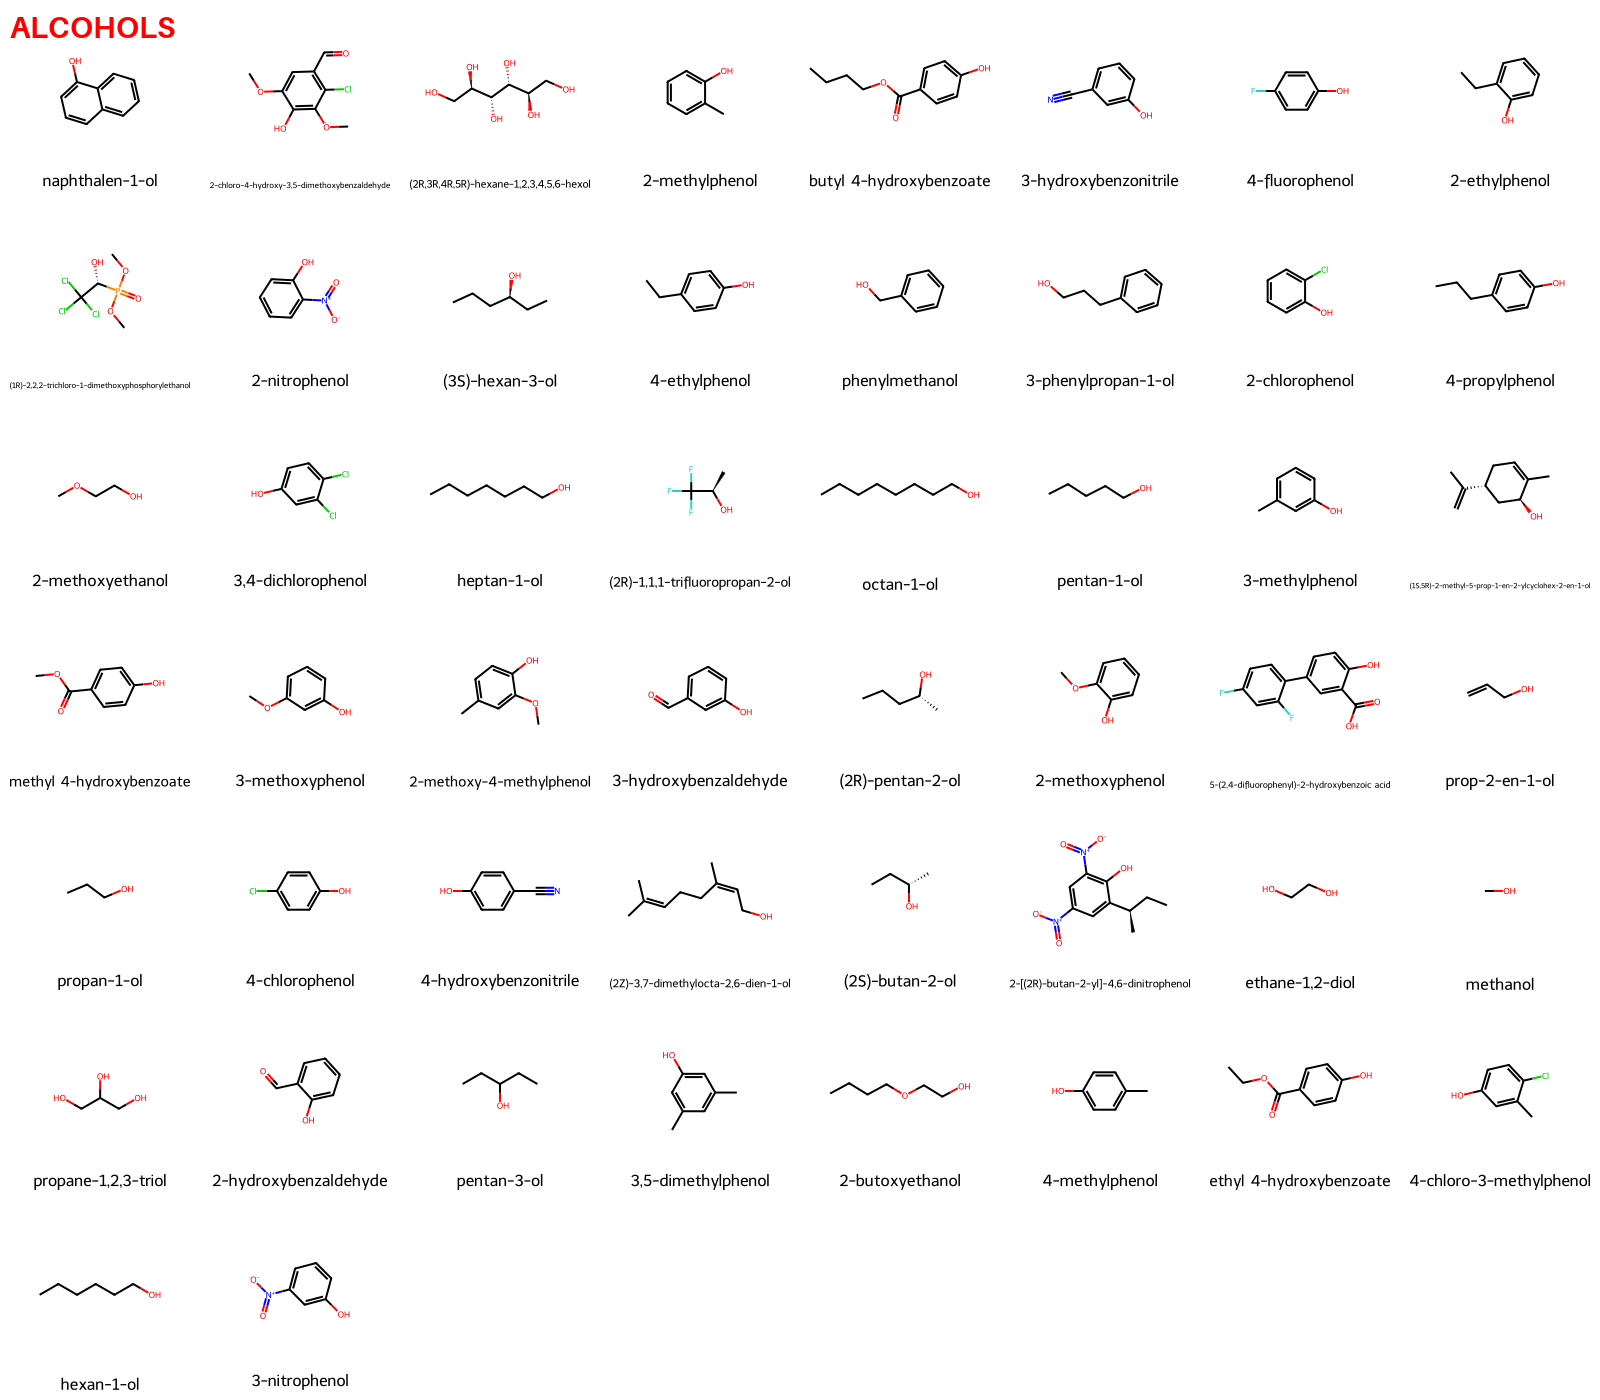

In [37]:
get_figures('alcohols')

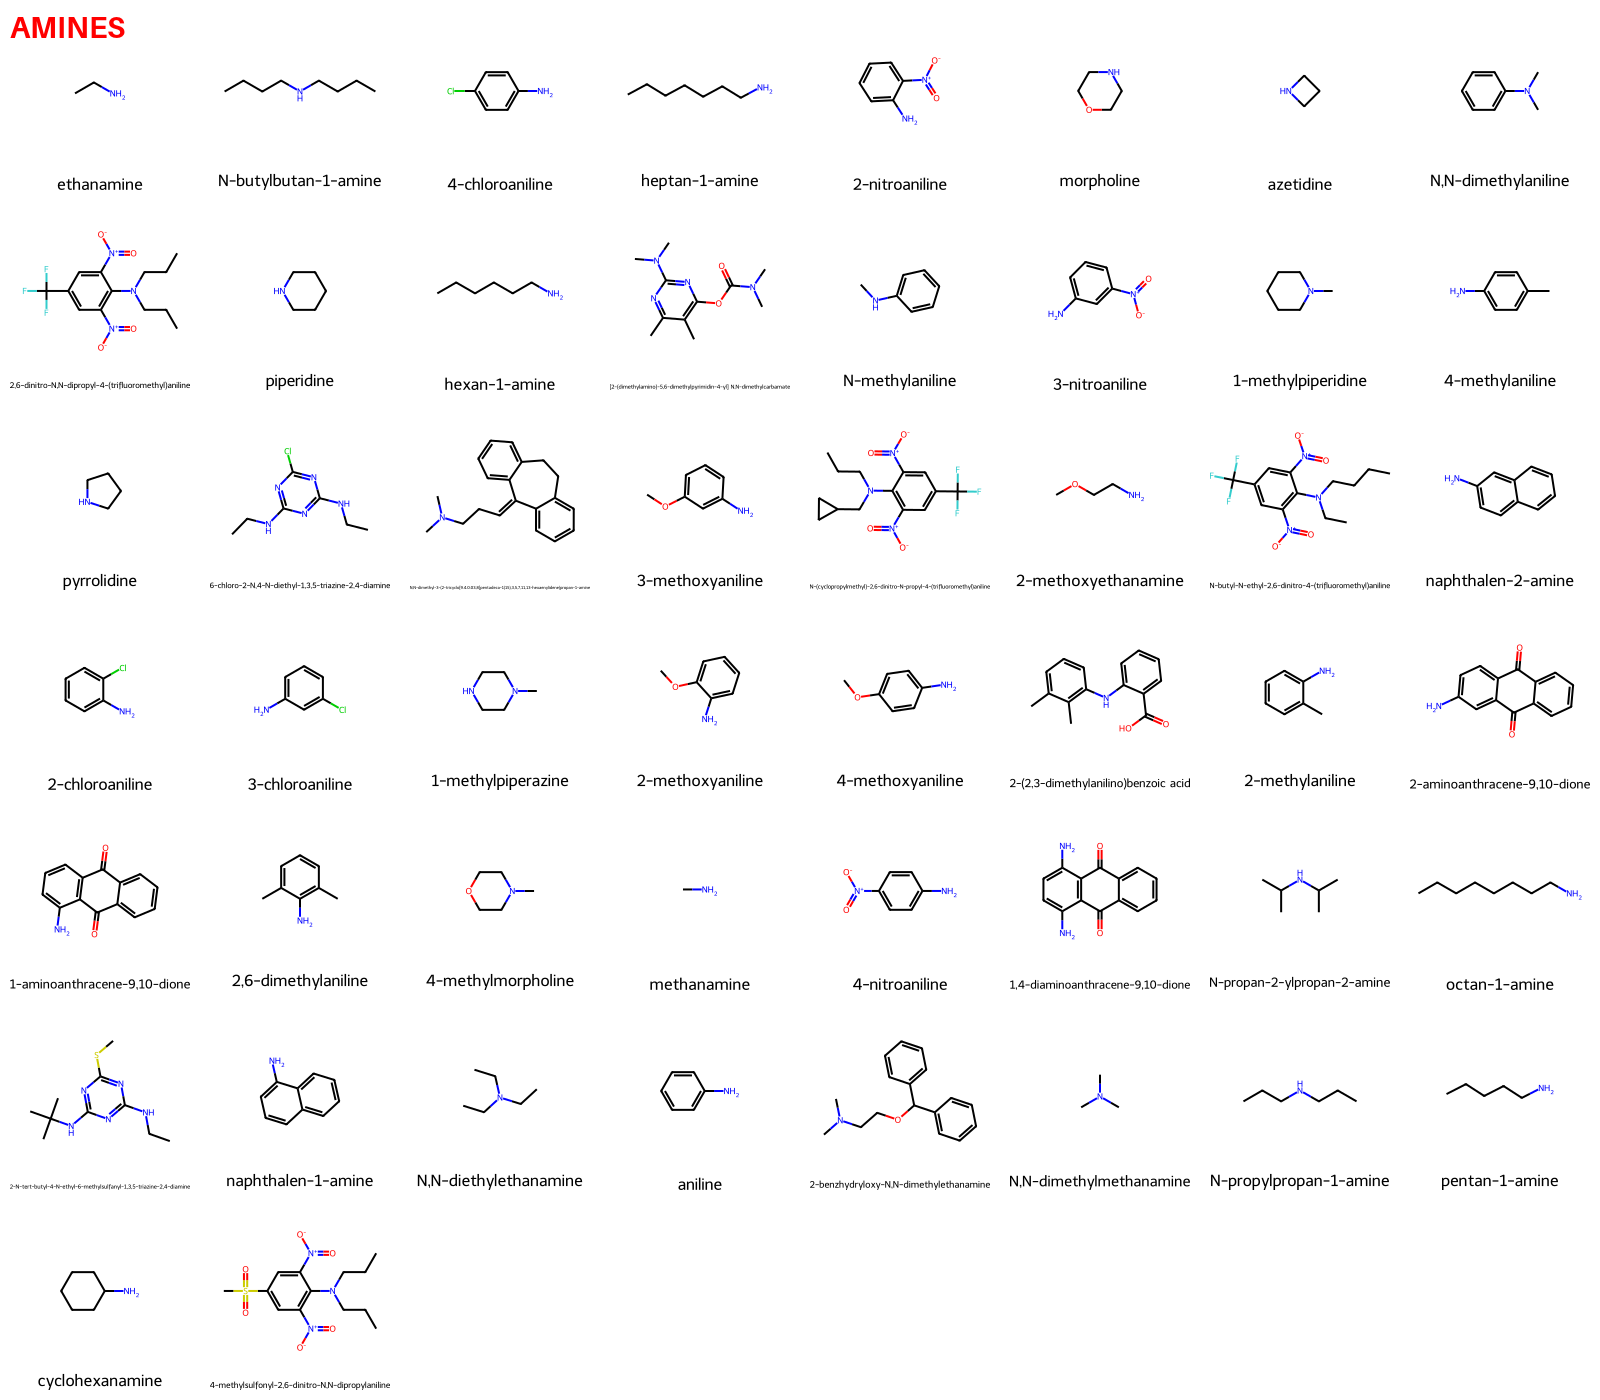

In [38]:
get_figures('amines')

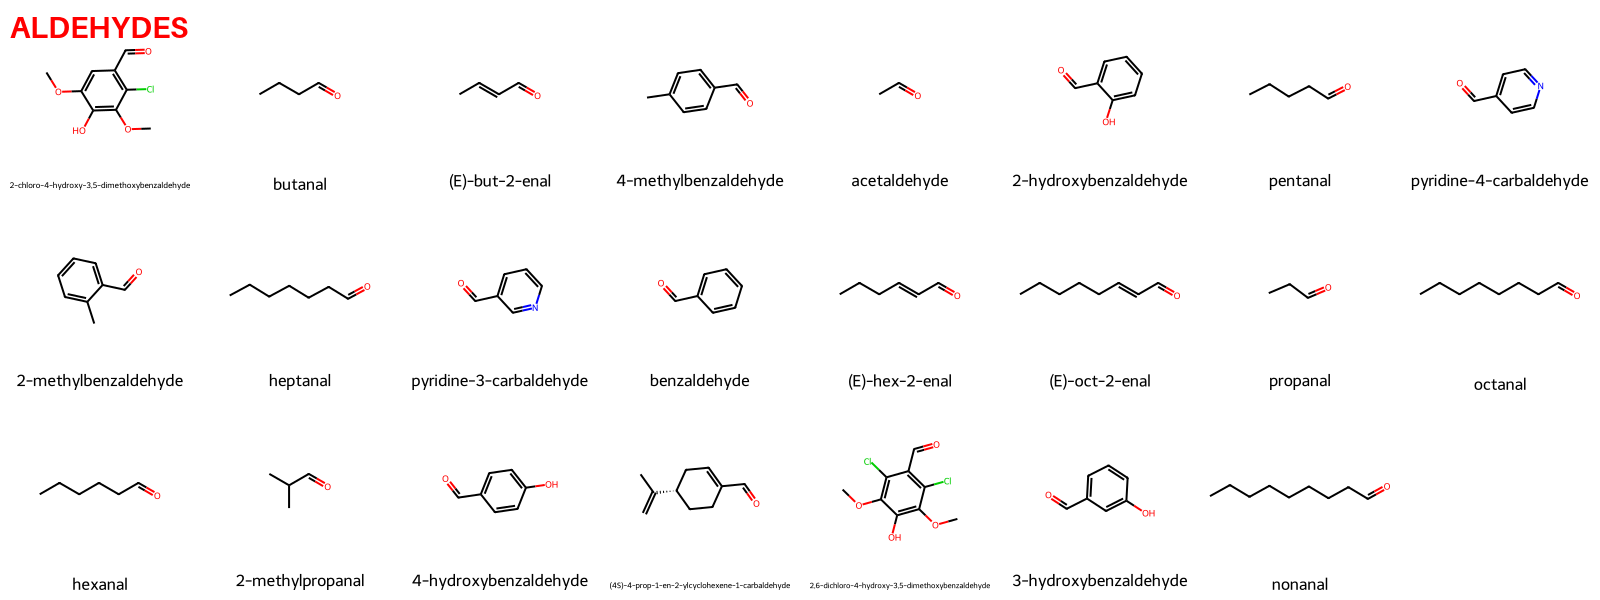

In [39]:
get_figures('aldehydes')

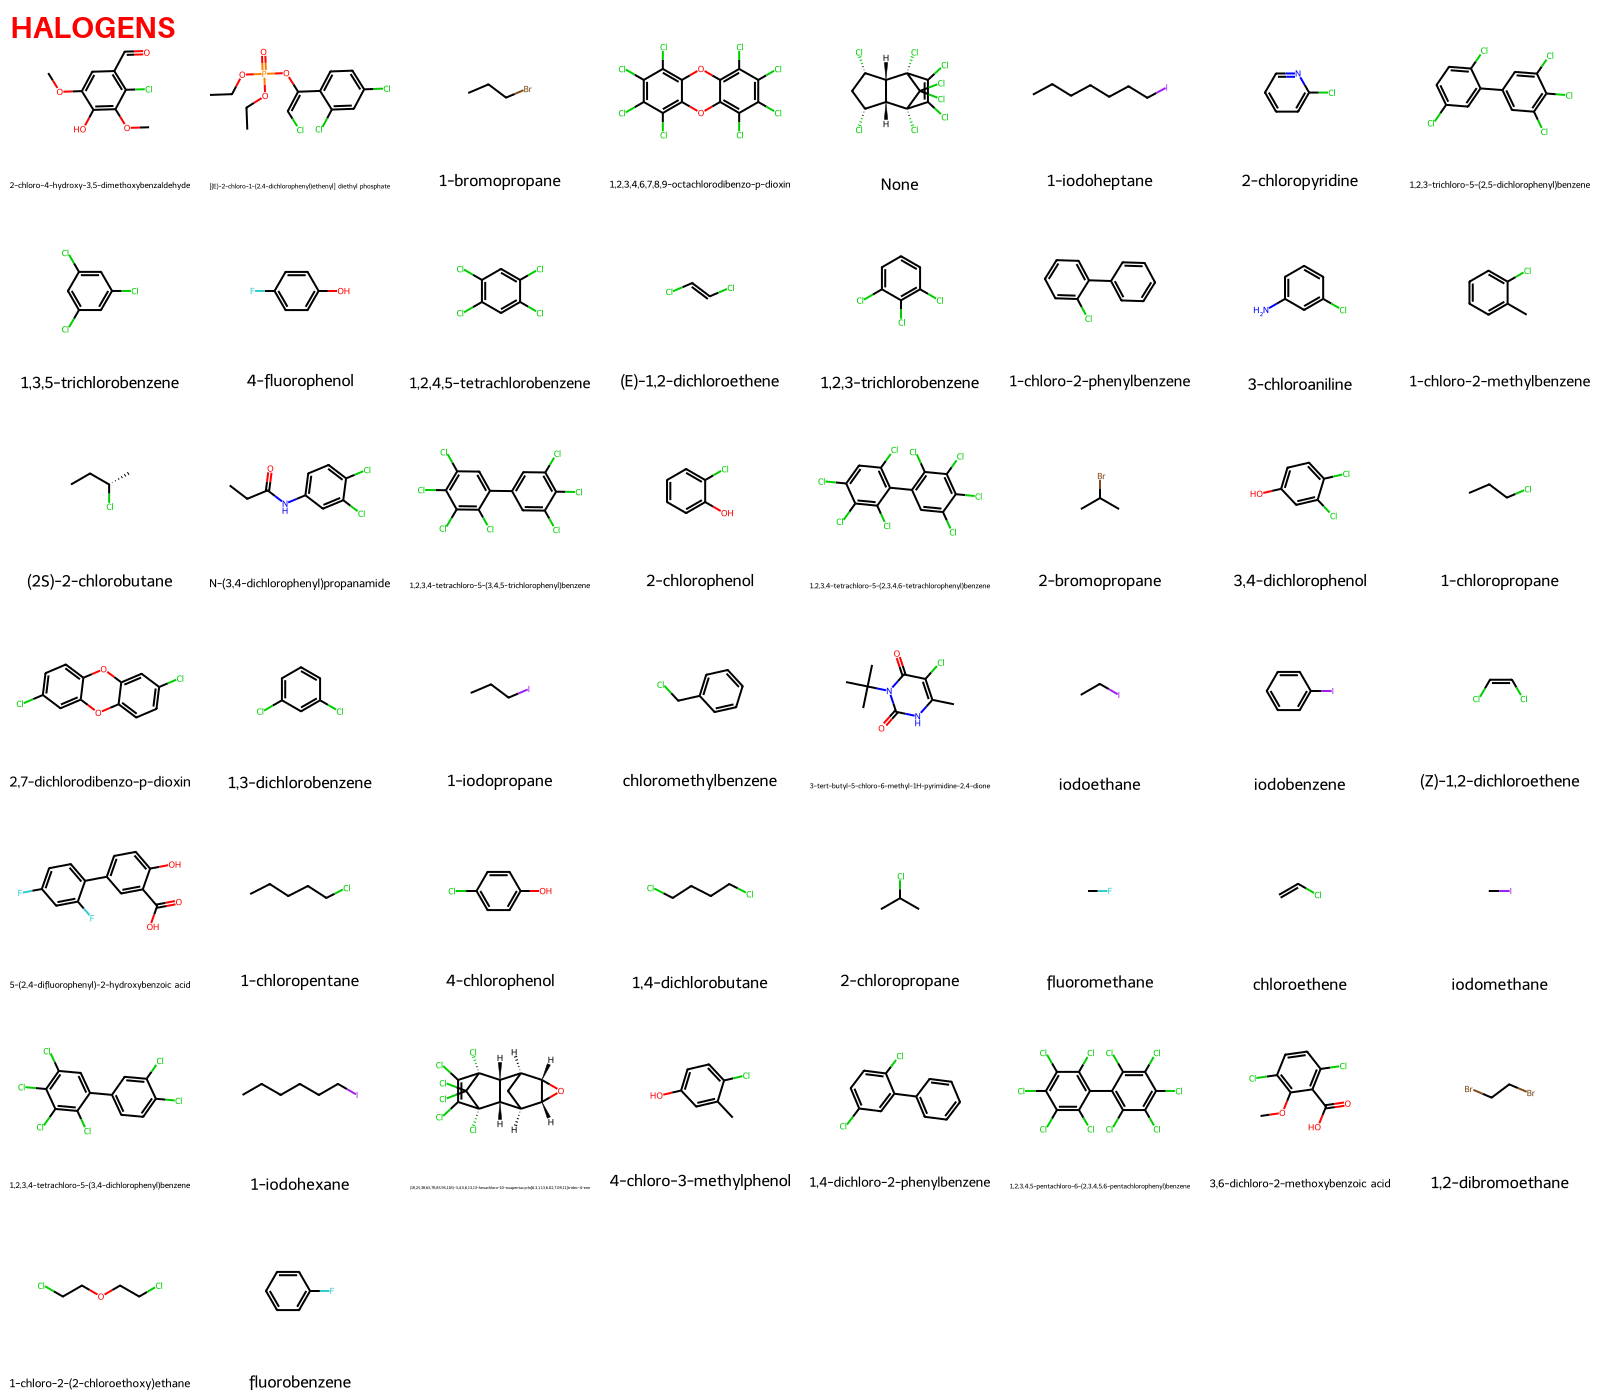

In [41]:
get_figures('halogens')

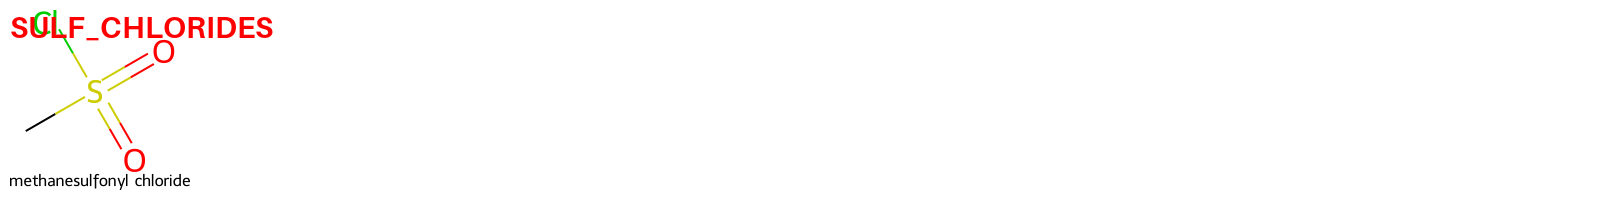

In [42]:
get_figures('sulf_chlorides')

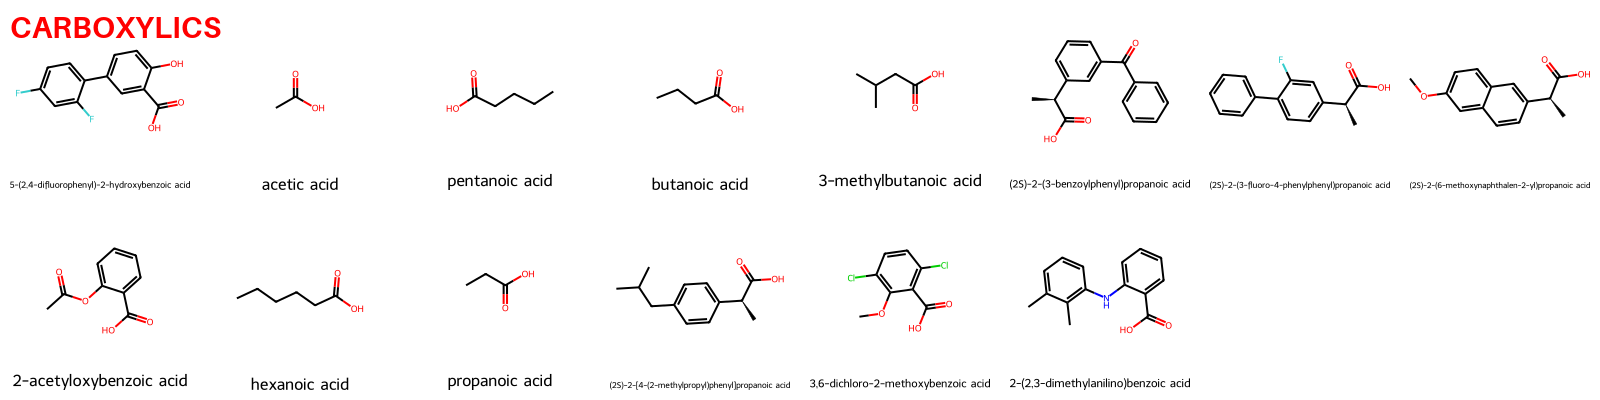

In [43]:
get_figures('carboxylics')

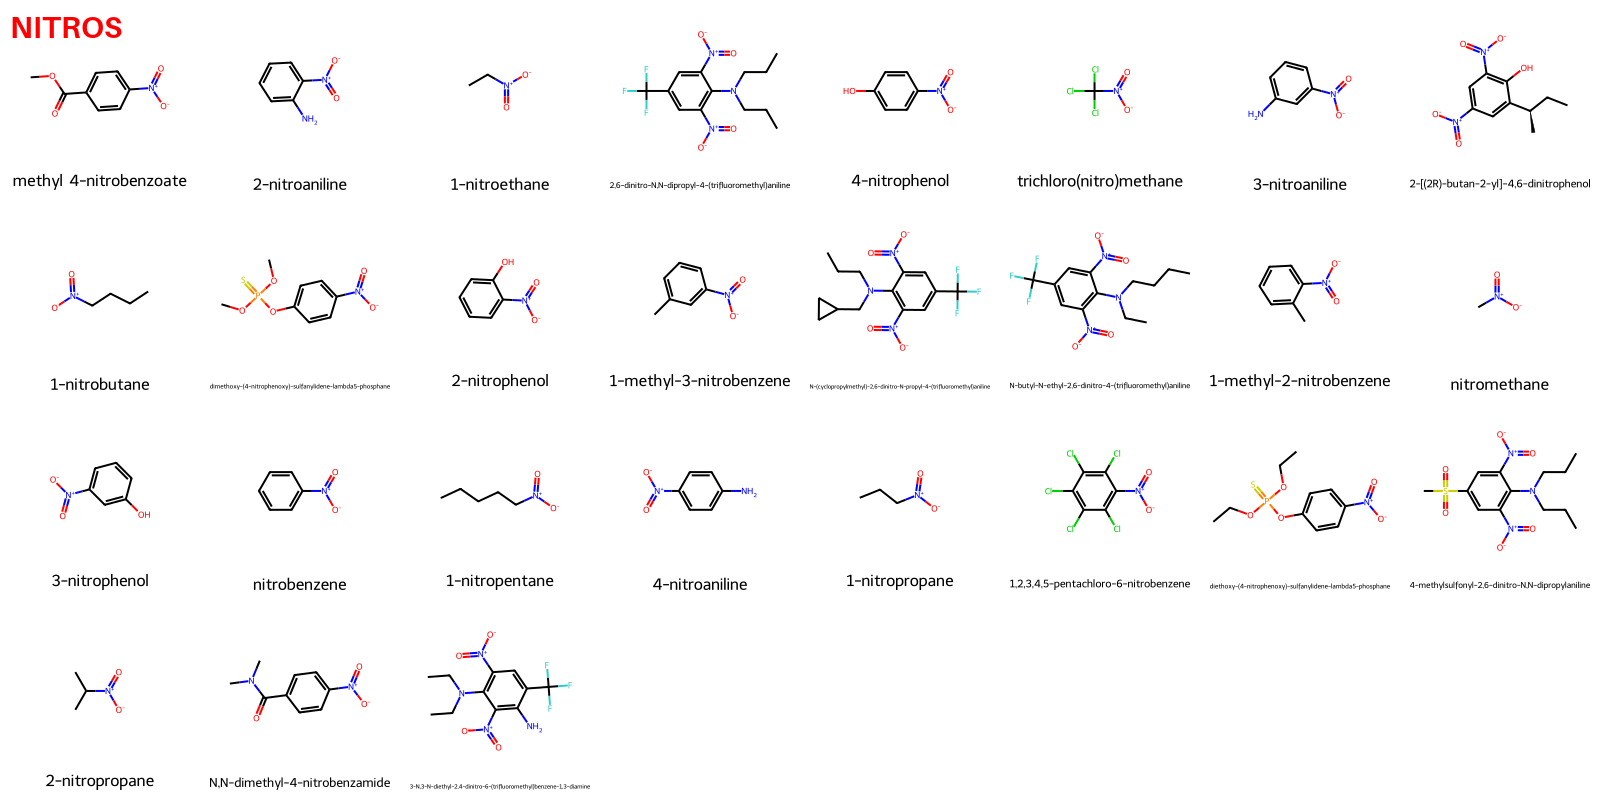

In [44]:
get_figures('nitros')

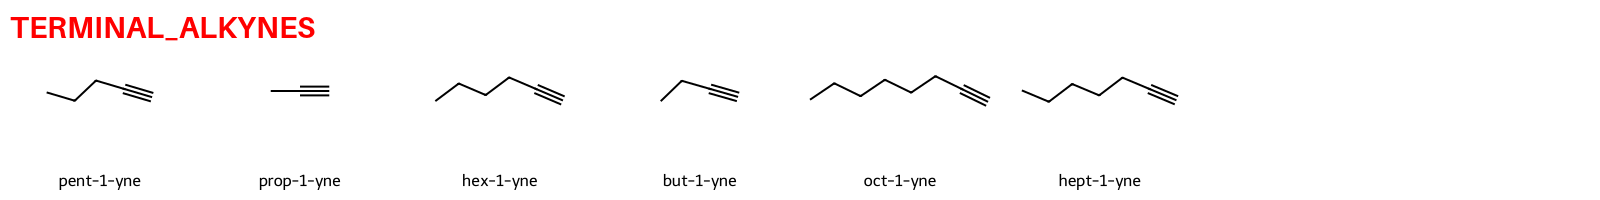

In [45]:
get_figures('terminal_alkynes')

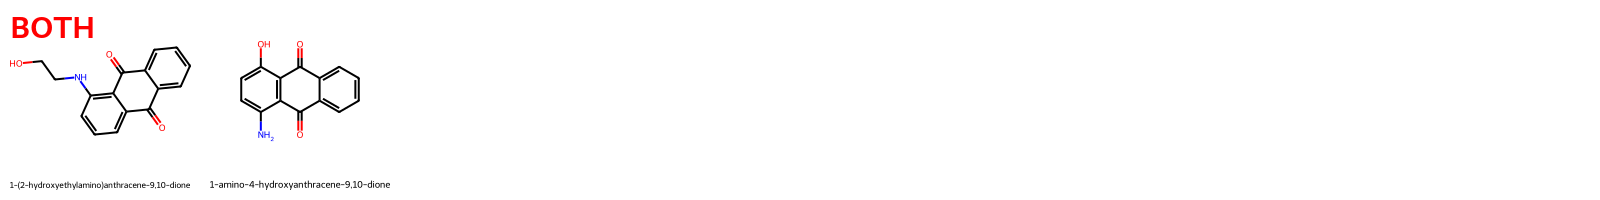

In [47]:
get_figures('both')

In [48]:
# get_figures('other')

In [49]:
sfes_df

,Id,Temperature (K),Pressure (kPa),Phase,N Components,Component 1,Role 1,Mole Fraction 1,Exact Amount 1,Component 2,Role 2,Mole Fraction 2,Exact Amount 2,SolvationFreeEnergy Value (kJ / mol),SolvationFreeEnergy Uncertainty (kJ / mol),Source
0,265c7378309c4355aa01d60af70d3fca,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCCCCC(=O)OC,Solute,None,1,-10.41816,2.5104,10.1021/ct050097l
1,f89c43a7ef684aca89df924b29c487b1,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCCCO,Solute,None,1,-19.74848,2.5104,10.1021/ct050097l
2,198b886769694cc39828af5af498fd24,298.15,101.325,Liquid,2,O,Solvent,1.0,None,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)cc1Cl,Solute,None,1,-12.71936,0.4184,10.1007/s10822-012-9568-8
3,6cdf0d7abd354d8284ffe115d4c0ef33,298.15,101.325,Liquid,2,O,Solvent,1.0,None,NC1CCCCC1,Solute,None,1,-19.20456,2.5104,10.1021/ct050097l
4,e3e4778832a240eba754b5d4d010d21d,298.15,101.325,Liquid,2,O,Solvent,1.0,None,O=COc1ccccc1,Solute,None,1,-15.98288,2.5104,10.5281/zenodo.596537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,0821476bf69143c4bd07f6e0d7f8e584,298.15,101.325,Liquid,2,O,Solvent,1.0,None,Cl/C=C/Cl,Solute,None,1,-3.26352,2.5104,10.1021/ct050097l
638,2e03601fd70142dd8092cc1eceb17b83,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCc1ccc(C)cc1,Solute,None,1,-3.97480,2.5104,10.1021/ct050097l
639,4ceca25966d64d3c88b9380829e7fa86,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCBr,Solute,None,1,-3.09616,2.5104,10.1021/ct050097l
640,bca16f5d94f54cf987903bcec2f9662b,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CC(C)SC(C)C,Solute,None,1,-5.06264,2.5104,10.1021/ct050097l


In [50]:
sfes_df.to_csv('sfes_experimental_dataset.csv')